In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
parentdir='E:/Fall_Deteticon/UR/data'

In [4]:
### 20次跌倒序列

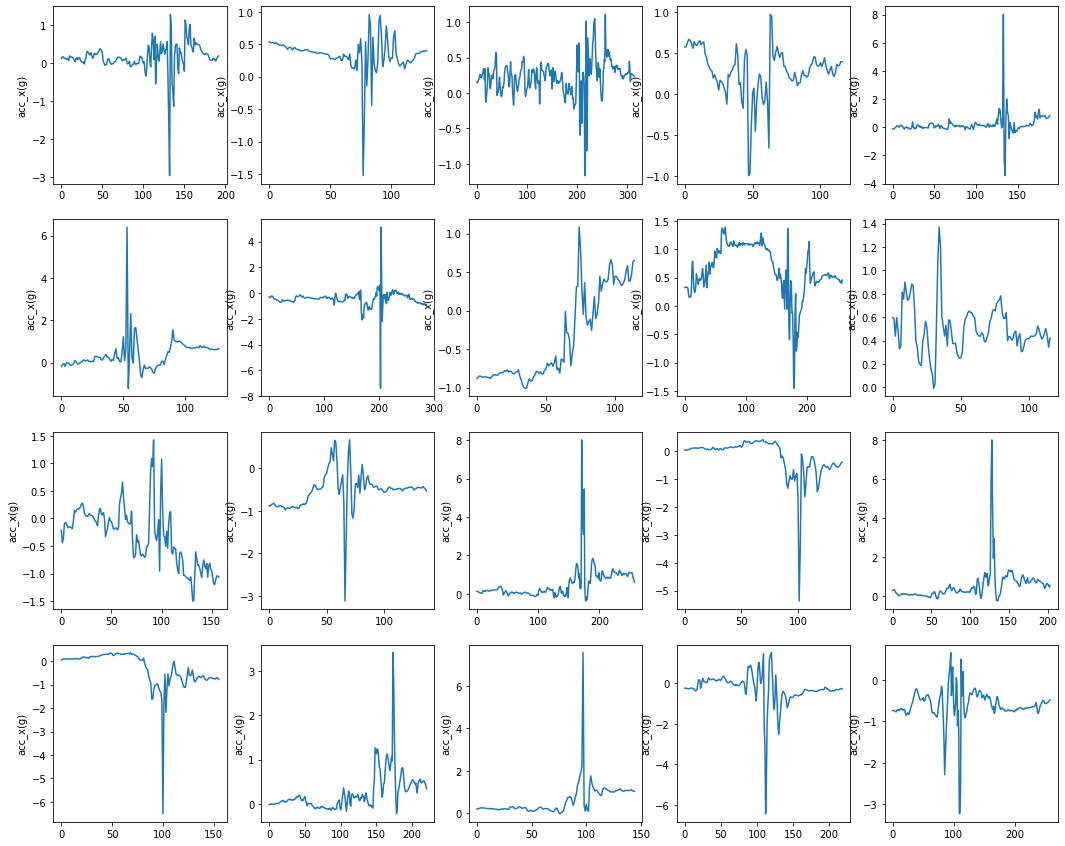

In [8]:
plt.figure(figsize=(18,15))
for i in range(20):
    num='%02d'%(i+1)
    fall_dir='E:/Fall_Deteticon/UR/data/fall/fall-'+str(num)+'-acc.csv'
    df = pd.read_csv(fall_dir,header=None)
    df = pd.DataFrame(df.values, columns=['timestep','acc_all','acc_x','acc_y','acc_z'])
    plt.subplot(4,5,i+1)
    plt.plot(df['acc_x'])
    plt.ylabel('acc_x(g)')

In [11]:
### 40次非跌倒序列

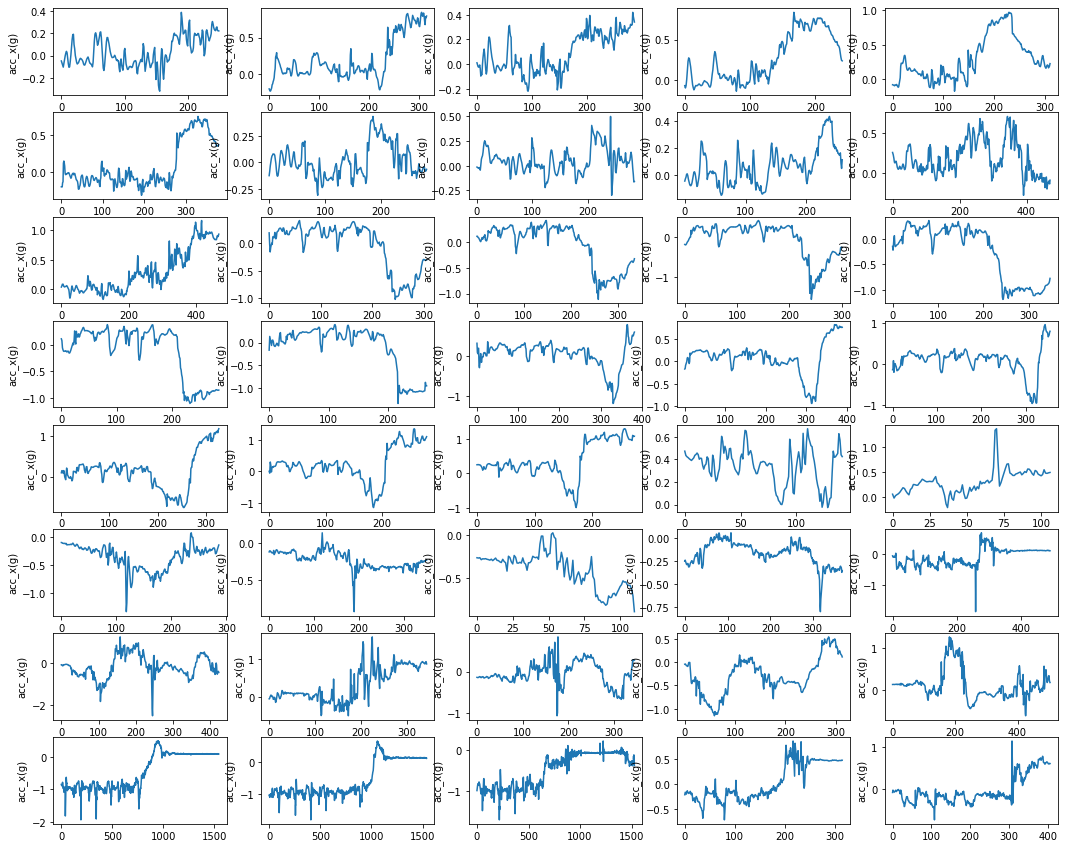

In [13]:
plt.figure(figsize=(18,15))
for i in range(40):
    num='%02d'%(i+1)
    adl_dir='E:/Fall_Deteticon/UR/data/adl/adl-'+str(num)+'-acc.csv'
    df = pd.read_csv(adl_dir,header=None)
    df = pd.DataFrame(df.values, columns=['timestep','acc_all','acc_x','acc_y','acc_z'])
    plt.subplot(8,5,i+1)
    plt.plot(df['acc_x'])
    plt.ylabel('acc_x(g)')

In [15]:
#### 序列调整，2条非跌倒序列后面接一条跌倒序列

,timestep,acc_all,acc_x,acc_y,acc_z,label_1
0,0.0,1.160735,-0.048638,1.149866,-0.150826,0.0
1,31.0,1.232825,-0.066079,1.221349,-0.154265,0.0
2,46.0,1.271040,-0.081063,1.259424,-0.151072,0.0
3,62.0,1.334946,-0.103908,1.315677,-0.200692,0.0
4,93.0,1.343159,-0.072465,1.311010,-0.282984,0.0
...,...,...,...,...,...,...
20277,3656.0,0.998381,-0.543122,0.076641,0.834212,1.0
20278,3661.0,0.982234,-0.533296,0.052814,0.823158,1.0
20279,3672.0,0.962674,-0.512662,0.003193,0.814806,1.0
20280,3688.0,0.947525,-0.487852,-0.026284,0.811858,1.0


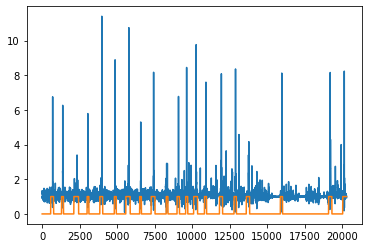

In [18]:
Parent_Fall="E:/Fall_Deteticon/UR/data/fall/"
Parent_Adl="E:/Fall_Deteticon/UR/data/adl/"

labels=[]
df=pd.DataFrame()
for i in range(20):
    adl_dir1='adl-'+str('%02d' % (i*2+1))+"-acc.csv"
    dk = pd.read_csv(Parent_Adl+adl_dir1,header=None)
    dk.insert(5, 'label_1', [0] * len(dk))
    df = pd.concat([df, dk])
    adl_dir2='adl-'+str('%02d' % (i*2+2))+"-acc.csv"
    dk = pd.read_csv(Parent_Adl+adl_dir2,header=None)
    dk.insert(5, 'label_1', [0] * len(dk))
    df = pd.concat([df, dk])
    fall_dir='fall-'+str('%02d' % (i+1))+"-acc.csv"
    dk = pd.read_csv(Parent_Fall+fall_dir,header=None)
    dk.insert(5, 'label_1', [1] * len(dk))
    df = pd.concat([df, dk])
df = pd.DataFrame(df.values, columns=['timestep','acc_all','acc_x','acc_y','acc_z','label_1'])
df.reset_index(drop=True, inplace=True)
display(df)
plt.plot(df['acc_all'])
plt.plot(df['label_1'])